In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
import pandas as pd
import numpy as np
with open(r"../Dane/zad6_lista1.txt") as file :
    df_array_1 = []
    df_array_2 = []
    for line in file:
        no_space_line = " ".join(line.split())
        no_space_line = no_space_line.split(" ")
        df_array_1.append(np.float64(no_space_line[0]))
        df_array_2.append(np.float64(no_space_line[1]))


df = pd.DataFrame(data={'x': df_array_1, 'y': df_array_2})

In [5]:
df['log_y'] = np.log(df['y'])

In [6]:
df.head()

,x,y,log_y
0,-0.741731,2.289068,0.828145
1,-0.851927,0.878991,-0.128981
2,0.861910,9.205162,2.219764
3,0.441435,5.820230,1.761340
4,1.649402,45.163982,3.810300


In [7]:
calculate_mean_x = np.mean(df['x'])
calculate_mean_y = np.mean(df['log_y'])

a_upper = sum([ (x-calculate_mean_x)*y for (x,y) in zip(df['x'],df['log_y'])])
a_down = sum([pow(x - calculate_mean_x,2) for x in df['x']])

a = a_upper/a_down
a
b = calculate_mean_y - calculate_mean_x*a
b

y_points = []

for (x,y) in zip(df['x'],df['log_y']):
    y_points.append(x*a + b)

print(a)
print(b)

1.1869261103422108
1.1904809318009155


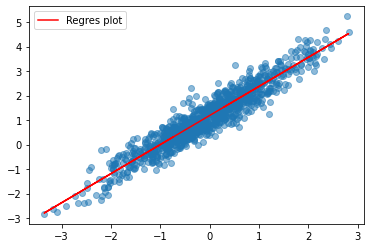

In [8]:
plt.scatter(df['x'],df['log_y'],alpha=0.5)
plt.plot(df['x'], y_points, color = 'red', label='Regres plot')
plt.legend()

In [11]:
R = []
R_upper = []
R_down = []
for (log_y,val) in zip(df['log_y'],y_points):
    R_upper.append(pow(val - calculate_mean_y, 2))
    R_down.append(pow(log_y - calculate_mean_y,2))
print("R : ", sum(R_upper)/sum(R_down))

R :  0.9008262911781612


C:\Users\denev\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\denev\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[0.00732093 1.18831582 1.183139  ]


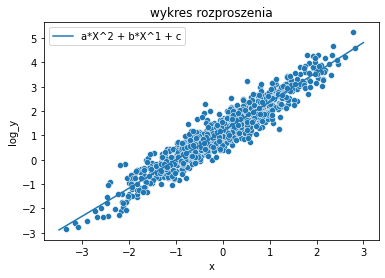

In [17]:

sns.scatterplot(df['x'],df['log_y'])
lin_range = np.linspace(-3.5,3,(1000))
rate = np.polyfit(df['x'],df['log_y'],2)
print(rate)
y_curve = []
for x in lin_range:
    y_curve.append(pow(x,2)*rate[0] + pow(x,1)*rate[1]+rate[2])

sns.lineplot(lin_range,y_curve, label='a*X^2 + b*X^1 + c')
plt.title("wykres rozproszenia")
plt.legend()
plt.savefig('tmp.png')